In [49]:
import pandas as pd
import numpy as np
import scipy
from scipy.stats.stats import pearsonr   
import matplotlib as mpl
import matplotlib.pyplot as plt

In [75]:
data_right = pd.read_excel('full_data_right.xlsx')
data_left = pd.read_excel('full_data_left.xlsx')
data_er = pd.read_excel('full_data_er.xlsx')

In [77]:
data_right.head()

Code Insee  Voix  % Voix/Ins  % Voix/Exp  % Abs/Ins  \
0        1001   107       18.32       33.44      44.69   
1        1002    32       14.28       25.20      41.52   
2        1004  1096       13.45       29.76      53.34   
3        1005   168       14.38       31.22      52.23   
4        1006    22       20.56       42.31      49.53   

     Libelle de la commune  P12_NSCOL15P_DIPL0  P12_NSCOL15P_CEP  \
0  L'Abergement-Clemenciat           14.000000         13.454545   
1    L'Abergement-de-Varey            8.888889          6.666667   
2        Amberieu-en-Bugey           17.637173          9.362333   
3      Amberieux-en-Dombes           16.016949         12.033898   
4                  Ambleon           15.555556          7.777778   

   P12_NSCOL15P_BEPC  P12_NSCOL15P_CAPBEP    ...       SNHMHO12  SNHM1812  \
0           5.818182            25.272727    ...            NaN       NaN   
1           3.333333            22.222222    ...            NaN       NaN   
2           5.783490            24.824518    ...      10.945976  9.724445   
3           6.186441            29.491525    ...            NaN       NaN   
4           8.888889            32.222222    ...            NaN       NaN   

    SNHM2612   SNHM5012 SNHMF1812  SNHMF2612  SNHMF5012  SNHMH1812  SNHMH2612  \
0        NaN        NaN       NaN        NaN        NaN        NaN        NaN   
1        NaN        NaN       NaN        NaN        NaN        NaN        NaN   
2  13.042454  15.461354  9.049192   11.33007  12.313855  10.194692  14.088531   
3        NaN        NaN       NaN        NaN        NaN        NaN        NaN   
4        NaN        NaN       NaN        NaN        NaN        NaN        NaN   

   SNHMH5012  
0        NaN  
1        NaN  
2  17.557177  
3        NaN  
4        NaN  

[5 rows x 168 columns]

In [78]:
import unicodedata

def unicode_to_string(word):
    if pd.isnull(word):
        return 
    else:
        return unicodedata.normalize('NFKD', word).encode('ascii','ignore')
    
def data_to_string(data):
    new_data = data.copy()
    
    col_title_unicode = new_data.columns.values.tolist()
    col_title = map(unicode_to_string,col_title_unicode)
    new_data.columns = col_title
    
    for col in new_data.columns:
        not_nan_index = [not ind for ind in new_data[col].isnull()]
        not_nan_value = new_data[col][not_nan_index]
        if type(not_nan_value.iloc[0]) == unicode: #check the first not-NaN value
            new_data[col] = map(unicode_to_string,new_data[col])
            
    return new_data

In [79]:
def float_to_int(data):
    new_data = data.copy()    
    for col in new_data.columns:
        if '%' in col or 'NSCOL15P' in col: 
            # Here we add this condition because the variable %voix needs to be in float format 
            # Need to think more about this in case we have more float-fotmat data 
            continue
        else: 
            not_nan_index = [not ind for ind in new_data[col].isnull()]
            not_nan_value = new_data[col][not_nan_index]
            if type(not_nan_value.iloc[0]) == np.float64: #check the first not-NaN value
                new_data[col] = new_data[col].round()
    return new_data

In [80]:
data_right = data_to_string(data_right)
data_right = float_to_int(data_right)

data_left = data_to_string(data_left)
data_left = float_to_int(data_left)

data_er = data_to_string(data_er)
data_er = float_to_int(data_er)

### We will create a new data frame containing only the variable needed. We drop all the others variables. 

In [81]:
def create_final_data(data):
    new_data = data.copy()
    title = data.columns.tolist()
    dropping_index = []
    keeping_variable = ['Code Insee','% Voix/Ins','% Voix/Exp','% immigrant','% C12_POP15P_CS1','% C12_POP15P_CS2','% C12_POP15P_CS3',
                        '% C12_POP15P_CS4','% C12_POP15P_CS5', '% C12_POP15P_CS6','% C12_POP15P_CS7', '% C12_POP15P_CS8',
                        'SNHM12','P12_NSCOL15P_DIPL0','P12_NSCOL15P_CEP','P12_NSCOL15P_BEPC','P12_NSCOL15P_CAPBEP','P12_NSCOL15P_BAC',
                        'P12_NSCOL15P_BACP2','P12_NSCOL15P_SUP']
    for index, variable in enumerate(title): 
        if variable not in keeping_variable:
            dropping_index.append(index)
    new_data = new_data.drop(new_data.columns[dropping_index], axis = 1)
    return new_data

In [82]:
selected_data_right = create_final_data(data_right)
selected_data_left = create_final_data(data_left)
selected_data_er = create_final_data(data_er)

In [83]:
selected_data_right.head()

Code Insee  % Voix/Ins  % Voix/Exp  P12_NSCOL15P_DIPL0  P12_NSCOL15P_CEP  \
0        1001       18.32       33.44           14.000000         13.454545   
1        1002       14.28       25.20            8.888889          6.666667   
2        1004       13.45       29.76           17.637173          9.362333   
3        1005       14.38       31.22           16.016949         12.033898   
4        1006       20.56       42.31           15.555556          7.777778   

   P12_NSCOL15P_BEPC  P12_NSCOL15P_CAPBEP  P12_NSCOL15P_BAC  \
0           5.818182            25.272727         16.909091   
1           3.333333            22.222222         18.333333   
2           5.783490            24.824518         19.110232   
3           6.186441            29.491525         16.016949   
4           8.888889            32.222222         22.222222   

   P12_NSCOL15P_BACP2  P12_NSCOL15P_SUP  % C12_POP15P_CS1  % C12_POP15P_CS2  \
0           15.272727          9.454545          2.588997          0.647249   
1           21.111111         18.888889          0.000000          2.116402   
2           13.109244         10.173010          0.000000          2.818540   
3           11.610169          8.644068          0.000000          5.611068   
4            6.666667          7.777778          0.000000          0.000000   

   % C12_POP15P_CS3  % C12_POP15P_CS4  % C12_POP15P_CS5  % C12_POP15P_CS6  \
0         12.944984         14.239482         18.770227         11.650485   
1         10.582011         27.513228          4.232804         16.931217   
2          6.451324         15.595920         17.143880         17.197566   
3          8.147579         17.524981         18.139892         14.681015   
4          4.651163         18.604651         18.604651          9.302326   

   % C12_POP15P_CS7  % C12_POP15P_CS8  % immigrant  SNHM12  
0         27.022654         12.297735     4.173623     NaN  
1         33.862434          4.232804     2.105263     NaN  
2         25.590551         15.211167    12.048946      13  
3         25.288240         10.607225     4.528012     NaN  
4         40.697674          9.302326     8.000000     NaN

In [84]:
def create_cor_table(data):
    variable_list = data.columns.tolist()
    columns_list = ['Sans diplome','CEP','BEPC','CAP-BEP','BAC','Enseignement_sup_court','Enseignement_sup_long','Agriculteurs','Artisans','Cadres','Prof_Intermediaire','Employes', 
               'Ouvrier', 'Retraite', 'Autre','Immigrants','Salaire'] # this list must be in the order of
                                                                                # the data's column list
    cor_right_party = pd.DataFrame(columns = columns_list)
    counter = 3 # because the first 3 variables in the variable list are not important 
    for col in columns_list:
        extract_data = data[['% Voix/Exp', variable_list[counter]]]
        extract_data = extract_data.dropna()
        cor = pearsonr(extract_data[extract_data.columns[0]], extract_data[extract_data.columns[1]])[0] * 100
        cor_right_party[col] = [cor]
        counter += 1 
    return cor_right_party

In [85]:
correlation_right_party = create_cor_table(selected_data_right)
correlation_left_party = create_cor_table(selected_data_left)
correlation_er_party = create_cor_table(selected_data_er)
correlation_table = pd.concat([correlation_right_party, correlation_left_party, correlation_er_party])

In [86]:
correlation_right_party

Sans diplome        CEP      BEPC   CAP-BEP       BAC  \
0     -5.213345  11.185025 -5.185977 -4.936157 -1.588563   

   Enseignement_sup_court  Enseignement_sup_long  Agriculteurs  Artisans  \
0                0.336956               4.121381     17.898836 -1.428497   

     Cadres  Prof_Intermediaire  Employes  Ouvrier  Retraite      Autre  \
0  6.420419           -3.340594 -9.659553 -1.31459   3.44955 -11.855126   

   Immigrants   Salaire  
0  -12.480203  38.13798

In [87]:
correlation_table.index = ['Right', 'Left', 'Extreme Right']

In [88]:
correlation_table = correlation_table.T

In [89]:
correlation_table

Right       Left  Extreme Right
Sans diplome            -5.213345  -8.784302      19.796930
CEP                     11.185025  -6.118871      -1.521515
BEPC                    -5.185977  13.399800      -5.434635
CAP-BEP                 -4.936157 -21.850844      25.678811
BAC                     -1.588563  11.317407     -12.159279
Enseignement_sup_court   0.336956   8.407505     -13.123457
Enseignement_sup_long    4.121381  18.979793     -28.263700
Agriculteurs            17.898836  -3.876219     -10.988869
Artisans                -1.428497   9.725289      -8.881199
Cadres                   6.420419   1.926759     -11.209943
Prof_Intermediaire      -3.340594  -1.687218       2.111625
Employes                -9.659553  -4.289384      13.264534
Ouvrier                 -1.314590 -23.814793      27.399715
Retraite                 3.449550  14.949167     -19.263977
Autre                  -11.855126   4.547704      10.093556
Immigrants             -12.480203  20.117342     -10.755233
Salaire                 38.137980 -15.832417     -23.728283

In [91]:
writer = pd.ExcelWriter('correlation_table_regional.xlsx')
correlation_table.to_excel(writer,'Sheet1')
writer.save()

### We do some data viz

In [92]:
%matplotlib inline
import seaborn as sns

In [93]:
selected_data_right.head()

Code Insee  % Voix/Ins  % Voix/Exp  P12_NSCOL15P_DIPL0  P12_NSCOL15P_CEP  \
0        1001       18.32       33.44           14.000000         13.454545   
1        1002       14.28       25.20            8.888889          6.666667   
2        1004       13.45       29.76           17.637173          9.362333   
3        1005       14.38       31.22           16.016949         12.033898   
4        1006       20.56       42.31           15.555556          7.777778   

   P12_NSCOL15P_BEPC  P12_NSCOL15P_CAPBEP  P12_NSCOL15P_BAC  \
0           5.818182            25.272727         16.909091   
1           3.333333            22.222222         18.333333   
2           5.783490            24.824518         19.110232   
3           6.186441            29.491525         16.016949   
4           8.888889            32.222222         22.222222   

   P12_NSCOL15P_BACP2  P12_NSCOL15P_SUP  % C12_POP15P_CS1  % C12_POP15P_CS2  \
0           15.272727          9.454545          2.588997          0.647249   
1           21.111111         18.888889          0.000000          2.116402   
2           13.109244         10.173010          0.000000          2.818540   
3           11.610169          8.644068          0.000000          5.611068   
4            6.666667          7.777778          0.000000          0.000000   

   % C12_POP15P_CS3  % C12_POP15P_CS4  % C12_POP15P_CS5  % C12_POP15P_CS6  \
0         12.944984         14.239482         18.770227         11.650485   
1         10.582011         27.513228          4.232804         16.931217   
2          6.451324         15.595920         17.143880         17.197566   
3          8.147579         17.524981         18.139892         14.681015   
4          4.651163         18.604651         18.604651          9.302326   

   % C12_POP15P_CS7  % C12_POP15P_CS8  % immigrant  SNHM12  
0         27.022654         12.297735     4.173623     NaN  
1         33.862434          4.232804     2.105263     NaN  
2         25.590551         15.211167    12.048946      13  
3         25.288240         10.607225     4.528012     NaN  
4         40.697674          9.302326     8.000000     NaN

In [131]:
right_na = selected_data_right.copy()
right_na.columns = ['Code Insee','% Voix/Ins', '% Voix/Exp', 'Sans diplome','CEP','BEPC','CAP-BEP','BAC',
                              'Enseignement_sup_court','Enseignement_sup_long','Agriculteurs','Artisans','Cadres',
                              'Prof_Intermediaire','Employes','Ouvrier', 'Retraite', 'Autre','Immigrants','Salaire']
right_na = right_na.fillna(0)

In [103]:
analyze_data_right = selected_data_right.copy()

In [104]:
analyze_data_right.columns = ['Code Insee','% Voix/Ins', '% Voix/Exp', 'Sans diplome','CEP','BEPC','CAP-BEP','BAC',
                              'Enseignement_sup_court','Enseignement_sup_long','Agriculteurs','Artisans','Cadres',
                              'Prof_Intermediaire','Employes','Ouvrier', 'Retraite', 'Autre','Immigrants','Salaire']

In [105]:
analyze_data_right.head()

Code Insee  % Voix/Ins  % Voix/Exp  Sans diplome        CEP      BEPC  \
0        1001       18.32       33.44     14.000000  13.454545  5.818182   
1        1002       14.28       25.20      8.888889   6.666667  3.333333   
2        1004       13.45       29.76     17.637173   9.362333  5.783490   
3        1005       14.38       31.22     16.016949  12.033898  6.186441   
4        1006       20.56       42.31     15.555556   7.777778  8.888889   

     CAP-BEP        BAC  Enseignement_sup_court  Enseignement_sup_long  \
0  25.272727  16.909091               15.272727               9.454545   
1  22.222222  18.333333               21.111111              18.888889   
2  24.824518  19.110232               13.109244              10.173010   
3  29.491525  16.016949               11.610169               8.644068   
4  32.222222  22.222222                6.666667               7.777778   

   Agriculteurs  Artisans     Cadres  Prof_Intermediaire   Employes  \
0      2.588997  0.647249  12.944984           14.239482  18.770227   
1      0.000000  2.116402  10.582011           27.513228   4.232804   
2      0.000000  2.818540   6.451324           15.595920  17.143880   
3      0.000000  5.611068   8.147579           17.524981  18.139892   
4      0.000000  0.000000   4.651163           18.604651  18.604651   

     Ouvrier   Retraite      Autre  Immigrants  Salaire  
0  11.650485  27.022654  12.297735    4.173623      NaN  
1  16.931217  33.862434   4.232804    2.105263      NaN  
2  17.197566  25.590551  15.211167   12.048946       13  
3  14.681015  25.288240  10.607225    4.528012      NaN  
4   9.302326  40.697674   9.302326    8.000000      NaN

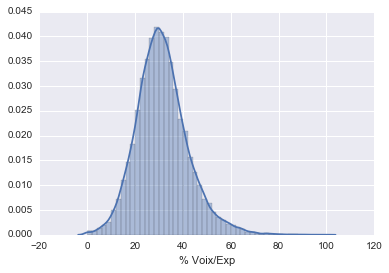

In [106]:
sns.distplot(analyze_data_right['% Voix/Exp'])

In [108]:
correlation_matrix = analyze_data_right[analyze_data_right.columns[2:]].corr()

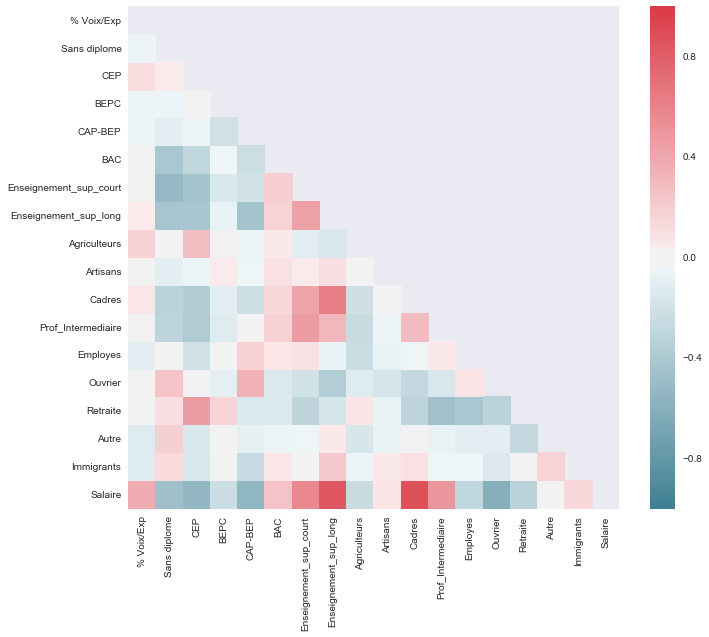

In [109]:
# Generate a mask for the upper triangle
mask = np.zeros_like(correlation_matrix, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(correlation_matrix, mask=mask, cmap=cmap)
            #, vmax=.3,
            #square=True, xticklabels=5, yticklabels=5,
            #linewidths=.5, cbar_kws={"shrink": .5}, ax=ax)

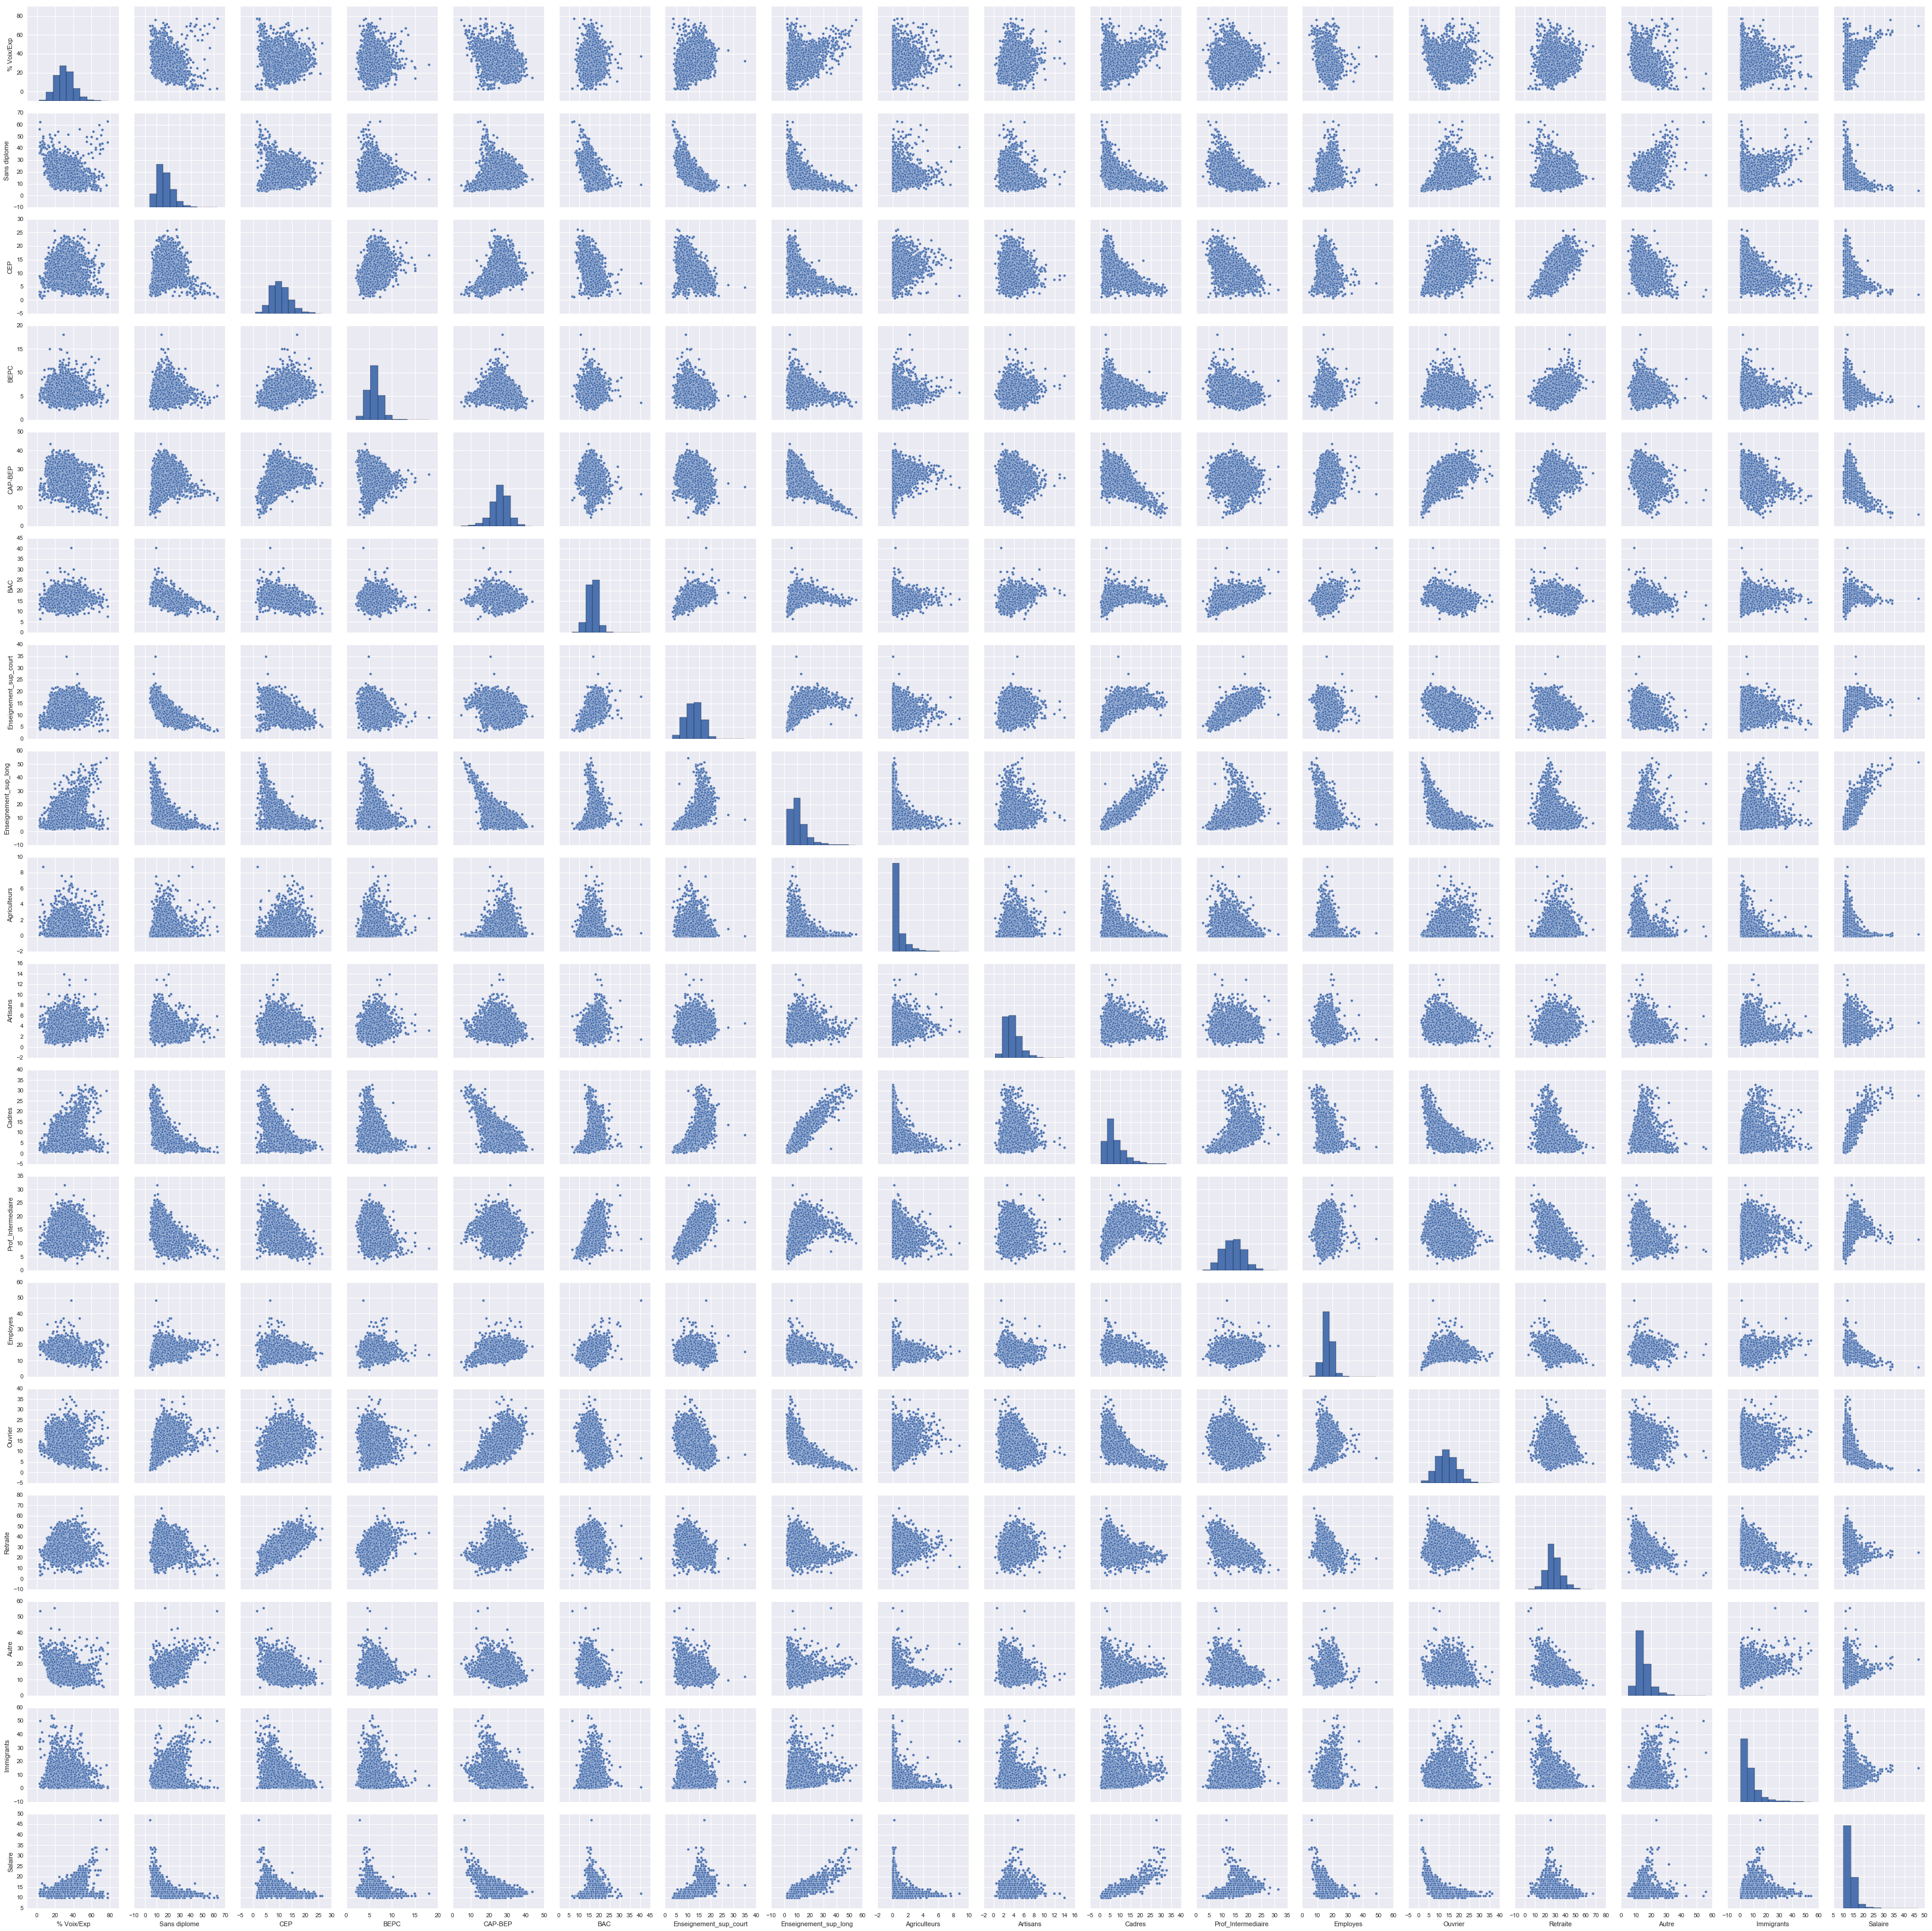

In [111]:
right_drop_na = analyze_data_right.dropna()
sns.pairplot(right_drop_na[right_drop_na.columns[2:]])

In [112]:
from sklearn import linear_model

In [113]:
lm = linear_model.LinearRegression()

In [114]:
right_drop_na[right_drop_na.columns[3:]].values

array([[ 17.63717252,   9.36233317,   5.78348987, ...,  15.21116679,
         12.04894605,  13.        ],
       [ 12.03861442,   7.83645656,   4.71323112, ...,  11.00579252,
          4.23280423,  13.        ],
       [ 32.13998391,   9.85518906,   5.10860821, ...,  14.8255814 ,
         30.71297989,  13.        ],
       ..., 
       [ 44.15986266,   3.27191424,   5.1983311 , ...,  29.46091456,
          1.63475828,  12.        ],
       [ 51.45354747,   3.35434031,   3.65928034, ...,  30.75801749,
          0.68990559,  11.        ],
       [ 62.94163831,   1.30855797,   7.38026695, ...,  33.74760994,
          0.45651129,  10.        ]])

In [115]:
lm.fit(right_drop_na[right_drop_na.columns[3:]].values,right_drop_na['% Voix/Exp'].values)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [116]:
lm.predict(right_drop_na[right_drop_na.columns[3:]].values)

array([ 30.02571121,  32.78815169,  35.36610652, ...,  22.92424888,
        21.88769906,  20.46262525])

In [117]:
np.mean((lm.predict(right_drop_na[right_drop_na.columns[3:]].values) - right_drop_na['% Voix/Exp'].values) ** 2)

71.033221134058394

In [118]:
lm.score(right_drop_na[right_drop_na.columns[3:]].values,right_drop_na['% Voix/Exp'].values)

0.30388257941942354

### Linear Regression

In [29]:
from sklearn import cross_validation, metrics

In [119]:
def modelfit(alg, dtrain, predictors, target):
    alg.fit(dtrain[predictors], dtrain[target])
    dtrain_predictions = alg.predict(dtrain[predictors])
    
    cv_score = cross_validation.cross_val_score(alg, dtrain[predictors], dtrain[target], cv=20, scoring='mean_squared_error') 
    cv_score = np.sqrt(np.abs(cv_score))
    
    #Print model report:
    print "\nModel Report"
    print "RMSE : %.4g" % np.sqrt(metrics.mean_squared_error(dtrain[target].values, dtrain_predictions))
    print "CV Score : Mean - %.4g | Std - %.4g | Min - %.4g | Max - %.4g" % (np.mean(cv_score),np.std(cv_score),np.min(cv_score),np.max(cv_score))
    print "R-squared: ", alg.score(dtrain[predictors], dtrain[target])
    


Model Report
RMSE : 8.428
CV Score : Mean - 8.459 | Std - 2.722 | Min - 6.236 | Max - 17.2
R-squared:  0.303882579419


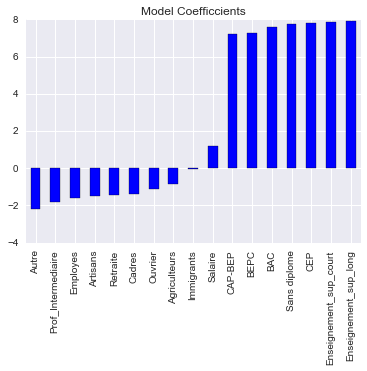

In [126]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso 
target = '% Voix/Exp'
predictors = right_drop_na.columns[3:]
lm = LinearRegression(normalize=True)
modelfit(lm, right_drop_na, predictors, target)
coef1 = pd.Series(lm.coef_, predictors).sort_values()
coef1.plot(kind='bar', title='Model Coefficcients')

### Baseline result

In [134]:
df.head()

Code Insee  % Voix/Ins  % Voix/Exp  P12_NSCOL15P_DIPL0  P12_NSCOL15P_CEP  \
2         1004       13.45       29.76           17.637173          9.362333   
5         1007       16.90       31.92           12.038614          7.836457   
12        1014       14.39       35.60           32.139984          9.855189   
20        1024       18.68       39.39           10.195531         10.242086   
21        1025       13.97       31.81           14.272560          9.069982   

    P12_NSCOL15P_BEPC  P12_NSCOL15P_CAPBEP  P12_NSCOL15P_BAC  \
2            5.783490            24.824518         19.110232   
5            4.713231            28.449744         20.329358   
12           5.108608            23.330652         14.159292   
20           4.795158            33.286778         18.575419   
21           5.755064            28.360958         17.541436   

    P12_NSCOL15P_BACP2  P12_NSCOL15P_SUP  % C12_POP15P_CS1  % C12_POP15P_CS2  \
2            13.109244         10.173010          0.000000          2.818540   
5            15.900057         10.846110          1.474460          3.264876   
12           10.016090          5.390185          0.000000          4.505814   
20           16.527002          6.378026          1.006711          2.181208   
21           16.252302          8.747698          1.668806          4.022251   

    % C12_POP15P_CS3  % C12_POP15P_CS4  % C12_POP15P_CS5  % C12_POP15P_CS6  \
2           6.451324         15.595920         17.143880         17.197566   
5           9.741969         17.904160         17.746182         15.429173   
12          5.523256         11.191860         11.918605         27.034884   
20          5.872483         18.791946         20.469799         18.624161   
21          4.835259         17.501070         17.030381         22.464698   

    % C12_POP15P_CS7  % C12_POP15P_CS8  % immigrant  SNHM12  
2          25.590551         15.211167    12.048946      13  
5          23.486045         11.005793     4.232804      13  
12         25.000000         14.825581    30.712980      13  
20         20.805369         12.248322     4.685521      13  
21         22.336329         10.141207     4.147465      12

In [135]:
base_result = df['% Voix/Exp'].copy()

In [136]:
base_result[:] = base_result.mean(axis=0)

In [137]:
print "RMSE : %.4g" % np.sqrt(metrics.mean_squared_error(df['% Voix/Exp'].values, base_result))

RMSE : 10.1


### Ridge regression


Model Report
RMSE : 8.624
CV Score : Mean - 8.512 | Std - 2.595 | Min - 6.204 | Max - 16.13
R-squared:  0.271071784651


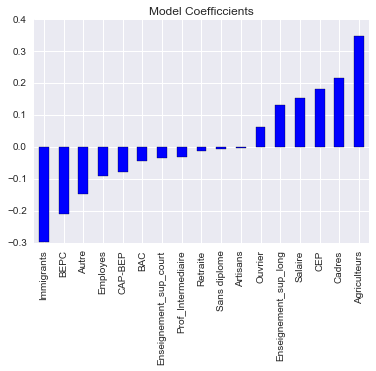

In [138]:
ridge_regression = Ridge(alpha = 0.5, normalize=True)
modelfit(ridge_regression, right_drop_na, predictors, target)
coef1 = pd.Series(lm.coef_, predictors).sort_values()
coef1.plot(kind='bar', title='Model Coefficcients')

### Lasso


Model Report
RMSE : 8.438
CV Score : Mean - 8.426 | Std - 2.678 | Min - 6.209 | Max - 16.77
R-squared:  0.302167505058


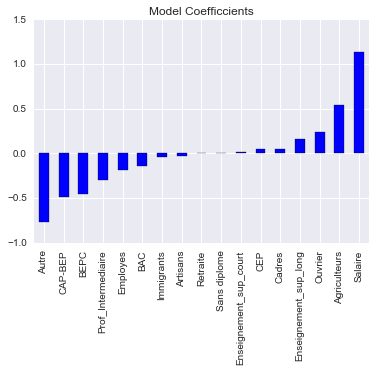

In [145]:
lasso_regression = Lasso(alpha = .001, normalize=True)
modelfit(lasso_regression, right_drop_na, predictors, target)
coef1 = pd.Series(lasso_regression.coef_, predictors).sort_values()
coef1.plot(kind='bar', title='Model Coefficcients')

## Elastic Net Reegression

In [140]:
from sklearn.linear_model import ElasticNet


Model Report
RMSE : 10.1
CV Score : Mean - 9.902 | Std - 2.345 | Min - 6.344 | Max - 16.62
R-squared:  0.0


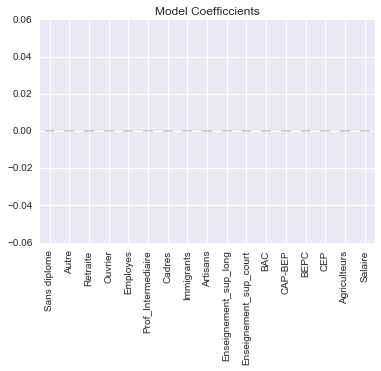

In [141]:
elastic_regression = ElasticNet(alpha = .5, normalize=True)
modelfit(elastic_regression, right_drop_na, predictors, target)
coef1 = pd.Series(elastic_regression.coef_, predictors).sort_values()
coef1.plot(kind='bar', title='Model Coefficcients')

### Decision tree regression

In [37]:
from sklearn.tree import DecisionTreeRegressor

In [38]:
decision_tree_regression = DecisionTreeRegressor(max_depth=15, min_samples_leaf=100)

In [48]:
modelfit(decision_tree_regression, df, predictors, target)
coef1 = pd.Series(decision_tree_regression.coef_, predictors).sort_values()
coef1.plot(kind='bar', title='Model Coefficcients')


Model Report
RMSE : 8.052
CV Score : Mean - 8.598 | Std - 2.292 | Min - 6.6 | Max - 16.24


AttributeError: 'DecisionTreeRegressor' object has no attribute 'coef_'